# Final Report - Group 10

This notebook contains all the procedures we have done in terms of exploratory data analysis (EDA), data cleaning, data pre-processing and feature engineering/selection.  

### Libaray

In [104]:
import pandas as pd
import numpy as np
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix
from collections import Counter
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
import miceforest as mf
from scipy.stats.mstats import winsorize

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandasql as ps
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
color = sns.color_palette()
sns.set_style('darkgrid')

## Bookmark

<a href=#p0>0. Understanding the Dataset</a>

<a href=#p1>1. EDA</a>

<a href=#p2>2. Data Pre-processing</a>

<a href=#p3>3. Feature Engineering</a>

## Read data

In [44]:
df = pd.read_csv("../bank-additional-full.csv",sep =";")

<a name='p0' /></a>
## 0. Understanding the Dataset

In [4]:
categoricals = ['job',
'marital',           
'education',
'default' ,          
'housing' ,          
'loan' ,            
'contact' ,       
'month',              
'day_of_week' ,   
'poutcome']

In [5]:
numericals=['age' ,                
'duration'  ,         
'campaign',            
'pdays'  ,             
'previous' ,           
'emp.var.rate',      
'cons.price.idx' ,   
'cons.conf.idx',    
'euribor3m' ,        
'nr.employed']

### 0.1 Statistical summary of training dataset

In [6]:
stats_table = df[numericals]
stats_table.describe(include ='all')
#stats_table.describe(include ='all').to_csv("my_description.csv")

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [45]:
for feature in categoricals:
    df[feature] = df[feature].astype('category')
#df.dtypes

### 0.2 Class Distribution

In [8]:
unique, counts = np.unique(df.y, return_counts=True)
cnt_dict = dict(zip(unique, counts/df.shape[0]))
pd.DataFrame(list(cnt_dict.items()), columns=['Class', 'Percentage'])

,Class,Percentage
0,no,0.887346
1,yes,0.112654


<a name='p1' /></a>
## 1. EDA

### 1.1 Bar Charts

In [9]:
numberVar=['age','duration','campaign','pdays','previous',
           'emp.var.rate','cons.price.idx','cons.conf.idx',
           'euribor3m','nr.employed']
categoryVar=['job','marital','education','default','housing',
             'loan','contact','month','day_of_week','poutcome','y']
client_1 = ['marital','default','housing','loan']
client_3 = ['job','education']
client_2 = ['age']
client_4 = ['job','education', 'marital','default','housing','loan']
nume1 = ['age','duration','campaign','pdays','previous']
contact_1 = ['contact','month','day_of_week','poutcome']
contact_2 = ['duration','campaign','pdays','previous']
socio_eco = ['emp.var.rate','cons.price.idx','cons.conf.idx',
             'euribor3m','nr.employed']

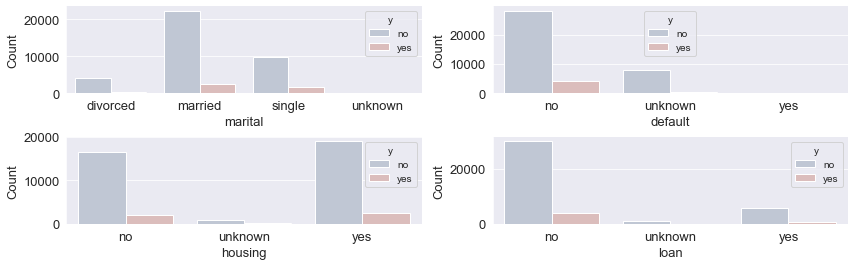

In [10]:
fig = plt.figure(figsize=(14,4))
grid = plt.GridSpec(nrows=2,ncols=2,wspace=0.2,hspace=0.5)

for j in range(len(client_1)):
    a = j//2
    b = j%2
    plt.subplot(grid[a,b])
    ax = sns.countplot(x = client_1[j], data = df, hue = 'y', palette = sns.color_palette("vlag",2))
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
    ax.tick_params(axis='y',labelsize=13)
    ax.tick_params(axis='x',labelsize=13)
    ax.set_xlabel(client_1[j], fontsize=13)
    ax.set_ylabel('Count',fontsize=13)
    sns.despine()
    #plt.title(j, fontsize=13)

fig.savefig('client_1.png', transparent=True)
    
    

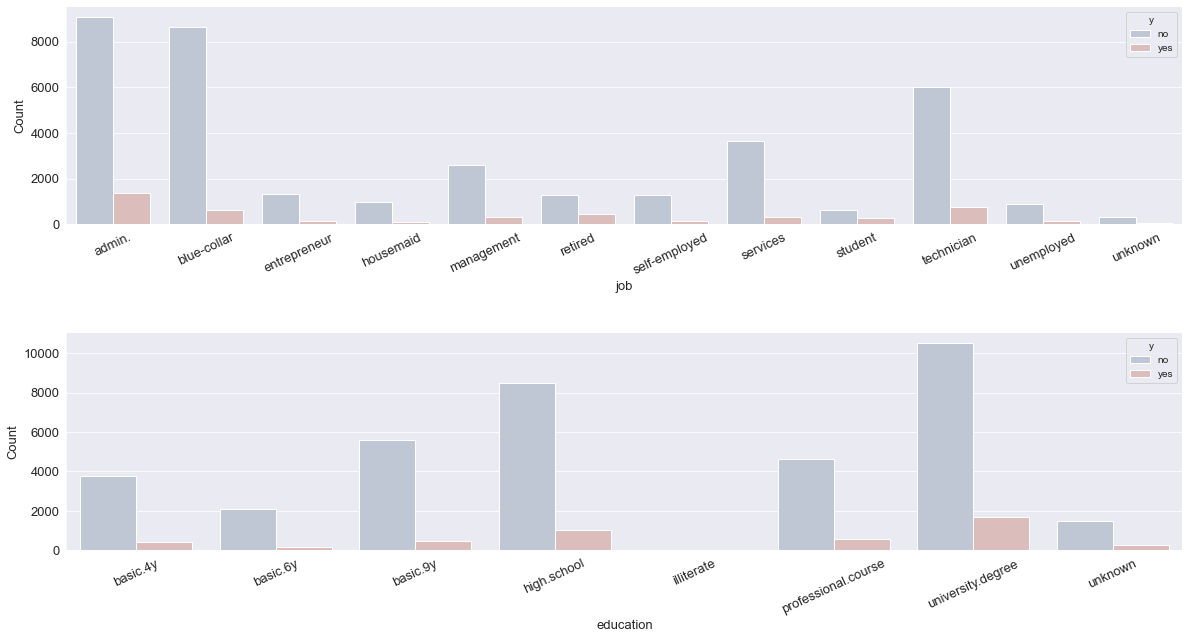

In [11]:
fig = plt.figure(figsize=(20,10))
grid = plt.GridSpec(nrows=2,ncols=1,wspace=0.2,hspace=0.5)

for j in range(len(client_3)):

    plt.subplot(grid[j,0])
    ax = sns.countplot(x = client_3[j], data = df, hue = 'y', palette = sns.color_palette("vlag",2))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
    ax.tick_params(axis='y',labelsize=13)
    ax.tick_params(axis='x',labelsize=13)
    ax.set_xlabel(client_3[j], fontsize=13)
    ax.set_ylabel('Count',fontsize=13)
    sns.despine()

fig.savefig('client_3.png', transparent=True)

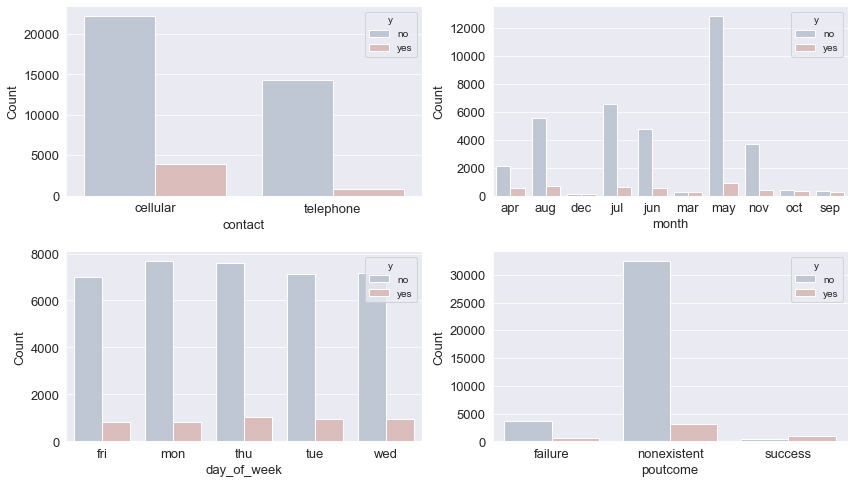

In [12]:
fig = plt.figure(figsize=(14,8))
grid = plt.GridSpec(nrows=2,ncols=2,wspace=0.2,hspace=0.3)

for j in range(len(contact_1)):
    a = j//2
    b = j%2
    plt.subplot(grid[a,b])
    ax = sns.countplot(x = contact_1[j], data = df, hue = 'y', palette = sns.color_palette("vlag",2))
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
    ax.tick_params(axis='y',labelsize=13)
    ax.tick_params(axis='x',labelsize=13)
    ax.set_xlabel(contact_1[j], fontsize=13)
    ax.set_ylabel('Count',fontsize=13)
    sns.despine()
    #plt.title(j, fontsize=13)

fig.savefig('contact_1.png', transparent=True)
    

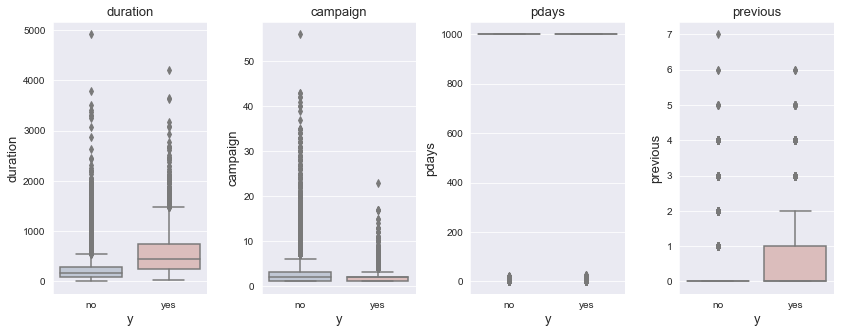

In [13]:
fig = plt.figure(figsize=(14,5))
grid = plt.GridSpec(nrows=1,ncols=4,wspace=0.35,hspace=0.3)

for i in range(len(contact_2)):
    a = i//2
    b = i%2
    plt.subplot(grid[0,i])
    ax1 = sns.boxplot(x = 'y', y = contact_2[i], data = df, orient = 'v', palette = sns.color_palette("vlag",2))
    ax1.set_ylabel(contact_2[i],fontsize=13)
    ax1.set_xlabel('y',fontsize=13)
    ax1.set_title(contact_2[i], fontsize=13)   
    
fig.savefig('contact_2.png', transparent=True)


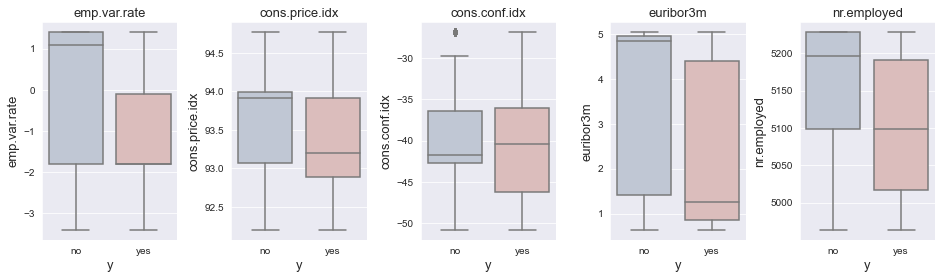

In [14]:
fig = plt.figure(figsize=(16,4))
grid = plt.GridSpec(nrows=1,ncols=5,wspace=0.4,hspace=0.3)

for i in range(len(socio_eco)):
    a = i//2
    b = i%2
    plt.subplot(grid[0,i])
    ax1 = sns.boxplot(x = 'y', y = socio_eco[i], data = df, orient = 'v', palette = sns.color_palette("vlag",2))
    ax1.set_ylabel(socio_eco[i],fontsize=13)
    ax1.set_xlabel('y',fontsize=13)
    ax1.set_title(socio_eco[i], fontsize=13)   
    
fig.savefig('socio_eco.png', transparent=True)


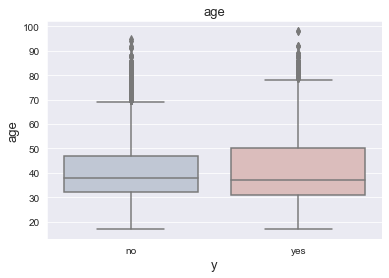

In [15]:
ax1 = sns.boxplot(x = 'y', y = 'age', data = df, 
            orient = 'v', palette = sns.color_palette("vlag",2))
ax1.set_ylabel('age',fontsize=13)
ax1.set_xlabel('y',fontsize=13)
ax1.set_title('age', fontsize=13) 
fig.savefig('age.png', transparent=True)

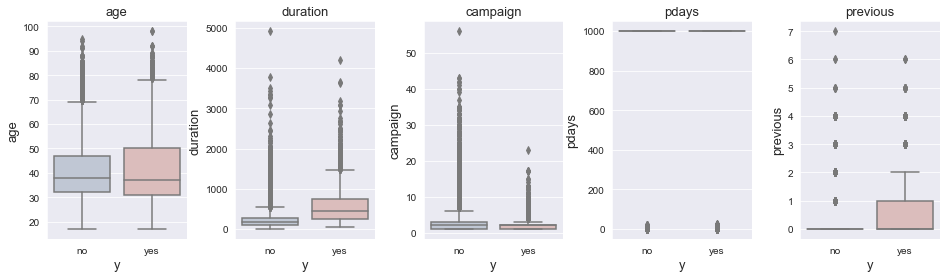

In [16]:
fig = plt.figure(figsize=(16,4))
grid = plt.GridSpec(nrows=1,ncols=5,wspace=0.35,hspace=0.3)

for i in range(len(nume1)):
    a = i//2
    b = i%2
    plt.subplot(grid[0,i])
    ax1 = sns.boxplot(x = 'y', y = nume1[i], data = df, orient = 'v', palette = sns.color_palette("vlag",2))
    ax1.set_ylabel(nume1[i],fontsize=13)
    ax1.set_xlabel('y',fontsize=13)
    ax1.set_title(nume1[i], fontsize=13)   
    
fig.savefig('age+contact_2.png', transparent=True)


### 1.2 Correlation Matrix

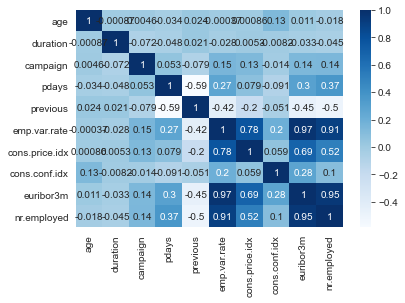

In [17]:
correlation_matrix = df.corr()
cmap = sns.color_palette("Blues",as_cmap=True)
fig = sns.heatmap(correlation_matrix, annot =True, cmap=cmap)

<a name='p2' /></a>
## 2. Data Preprocessing

### 2.1 Fix Possible Data Entry Errors
Fix one logical faliure (bug): if pdays=999, then previous should equals to 0 and poutcome should be non existence.

In [46]:
df['previous'].where((df['pdays']!=999), 0, inplace=True)
df['poutcome'].where((df['pdays']!=999), 'nonexistent', inplace=True)

### 2.2 Unknown to Nan

In [47]:
col_with_mv = ['job', 'marital', 'education', 'default', 'housing', 'loan']

for col in col_with_mv:
    df[col].replace('unknown',np.nan,inplace=True)

### 2.3 Encoding & Missing Value Handling - MICE

In [32]:
df_for_impute = df.copy()

In [33]:
# foe education, we treat it as an ordered categorical variable
var_encode_dic={'education':[['basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree'],[1,2,3,4,0,5,6]]}
for i in var_encode_dic.keys():
    df_for_impute[i].replace(var_encode_dic[i][0], var_encode_dic[i][1], inplace=True)

# for contact, y, default, job etc. there aren't any internal order within. 
# However, to do MICE imputation, all variables must be converted to numbers
# So we "label" them firstly and then do one-hot encoding later on
var_encode_dic2={'contact':[['cellular','telephone'],[0,1]],'y':[['no','yes'],[0,1]],'default':[['no','yes'],[0,1]],
                'job':[['admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed'],[0,1,2,3,4,5,6,7,8,9,10]],
               'marital':[['divorced','married','single'],[0,1,2]],'housing':[['no','yes'],[0,1]],'loan':[['no','yes'],[0,1]]
               }

for i in var_encode_dic2.keys():
    df_for_impute[i].replace(var_encode_dic2[i][0], var_encode_dic2[i][1], inplace=True)

In [35]:
dummy_features=[
 'month',
 'day_of_week',
 'poutcome']

# get dummies
df_for_impute = pd.get_dummies(data=df_for_impute, columns=dummy_features,drop_first=False)

In [37]:
# mice imputation
rng = np.random.RandomState(0)
N_SPLITS = 5

clf = RandomForestClassifier(random_state=0)

In [38]:
def get_impute_miceforest(missing_data):
    kernel = mf.MultipleImputedKernel(missing_data,datasets=4,save_all_iterations=True,random_state=1)
    kernel.mice(5)
    completed_data = kernel.complete_data(3)
    return completed_data

In [39]:
df_imputed = get_impute_miceforest(df_for_impute)

### 2.4 Remove Outliers (Winsorizing)

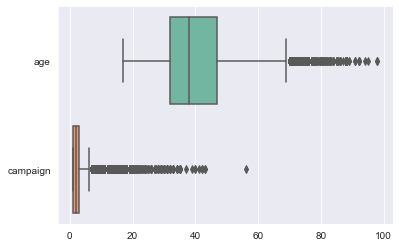

In [48]:
# now move to outliers removal part, draw box plot first to see the patterns
plt.clf()
df_plt=df[['age','campaign']]
ax = sns.boxplot(data=df_plt, orient="h", palette="Set2")
plt.show()

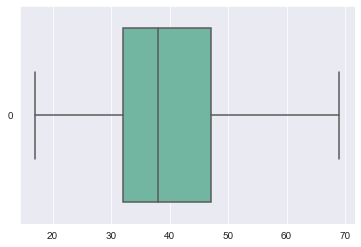

In [49]:
# winsorize age
temp_age=winsorize(df_imputed['age'], limits=[0, 0.0114])
sns.boxplot(data=temp_age, orient="h", palette="Set2")
age=pd.DataFrame(temp_age,columns=['age'])

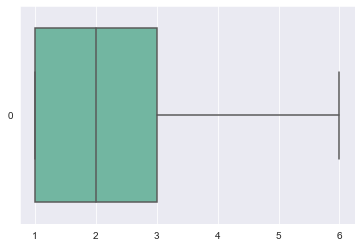

In [50]:
# winsorize campaign
temp_campaign=winsorize(df_imputed['campaign'], limits=[0, 0.0585])
sns.boxplot(data=temp_campaign, orient="h", palette="Set2")
campaign=pd.DataFrame(temp_campaign,columns=['campaign'])

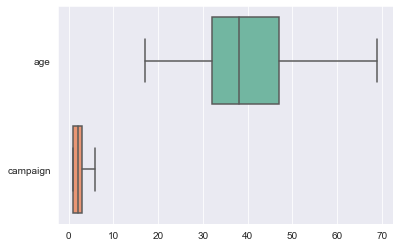

In [51]:
# draw box plot again after winsorization
plt.clf()
data_afterwin=pd.concat([age,campaign],axis=1)
ax = sns.boxplot(data=data_afterwin, orient="h", palette="Set2")
plt.show()

In [80]:
df_imputed.drop(columns=['age','campaign'],inplace=True)
df_processed=pd.concat([df_imputed,data_afterwin],axis=1)

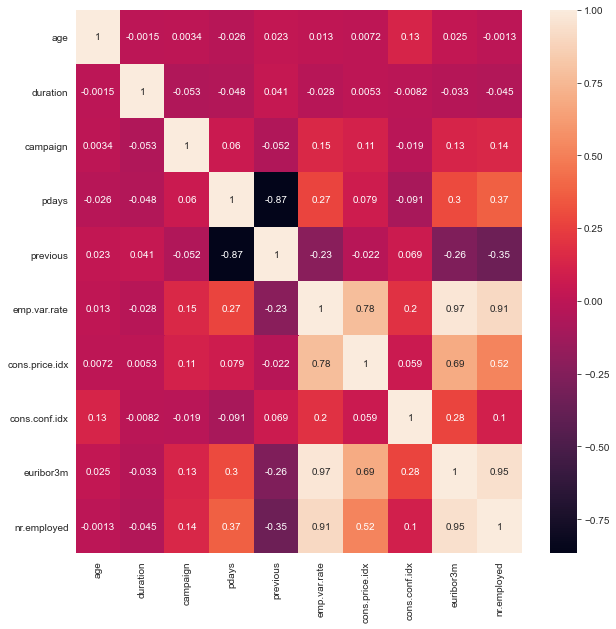

In [81]:
# draw correlation coefficient matrix
f, ax = plt.subplots(figsize=(10, 10))
corr = df_processed[numericals].corr()
sns.heatmap(corr, annot = True)

plt.show()

<a name='p3' /></a>
## 3. Feature Engineering

In [82]:
df_processed['y'].replace("no", 0, inplace = True)
df_processed['y'].replace("yes", 1, inplace = True)

### 3.1 Cluster Age

In [83]:
df_processed['age_bin']=pd.cut(df_processed['age'], [0, 60,200], labels=['1','2'],include_lowest=True,right=False)

### 3.2 Add binary variables
Binary variables based on pdays,previous

In [84]:
df_processed.loc[df_processed['previous']>0,'previous_zero_or_not'] = 1
df_processed.loc[df_processed['previous']==0,'previous_zero_or_not'] = 0

df_processed.loc[df_processed['pdays']<999,'pdays_999_or_not'] = 0
df_processed.loc[df_processed['pdays']==999,'pdays_999_or_not'] = 1

### 3.3 Add new features

In [90]:
onehot_list=[]
for i in ['job', 'marital']:
    temp=pd.get_dummies(df_processed[i],prefix=i)
    onehot_list.append(temp)
df_droped=df_processed.drop(columns=['job', 'marital'])
df_processed=pd.concat([df_droped,onehot_list[0],onehot_list[1]],axis=1)

#### A. For macroeconomic factors: 

- CPI_DJI: cons.price.idx * Dow Johnes Index_monthly_adjclose >> higher this feature, less prob to subscribe to term deposit  

- Liability: i.e. No. of liability = default + housing + loan >>> hypothesis: more liability, less prob to subscribe to term deposit  

- effect_euribor3m: i.e. Effect of euribor3m = euribor3m * no. liability >>> euribor3m is interest. Hypothesis:  the higher the effect, less prob to subscribe to term deposit  

In [92]:
new_feature = pd.read_csv("bank-additional-full-new.csv")

In [93]:
df_processed = pd.concat([df_processed,new_feature['DJI_monthly_adjclose']],axis=1)

In [95]:
# create new feature 1 - CPI_DJI

df_processed['CPI_DJI']= df_processed['cons.price.idx']*df_processed['DJI_monthly_adjclose']

In [96]:
# create new feature 2 - liability

df_processed['liability']= df_processed['default'].astype(int) + df_processed['housing'].astype(int) + df_processed['loan'].astype(int)

In [97]:
# create new feature 3 - effect_euribor3m

df_processed['effect_euribor3m']= df_processed['euribor3m'] * df_processed['liability']

#### B. The average value of y for each cluster group Note that this process is carried out in train set so no leakage problem is involved. 

- 1: Cluster by existing variables: education_cluster_avgy	age_bin_cluster_avgy	contact_cluster_avgy	job_cluster_avgy	marital_cluster_avgy	dft_cluster_avgy	housing_cluster_avgy	loan_cluster_avgy 


 
- 2: Clustrer by K-means: kmeans_avgy_2	kmeans_avgy_3	kmeans_avgy_4	kmeans_avgy_5 

In [123]:
df_processed.rename(columns={"default": "dft"},inplace=True)
df_processed.drop(columns=['age'],inplace=True)

In [124]:
y=df_processed['y']
X=df_processed.drop(columns=['y'])

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=1)

In [126]:
train=pd.concat([X_train,y_train],axis=1)

In [127]:
for i in ['education', 'age_bin', 'contact','dft', 'housing', 'loan']:
    X[i+'_cluster_avgy']=np.nan
    for j in X_train[i].unique():
        q = "SELECT avg(y) FROM train where "+i+' = '+str(j) # use train dataset to generate feature
        average_y_temp=ps.sqldf(q, locals()).iloc[0][0] 
        X[i+'_cluster_avgy'].where(X[i]!=j,average_y_temp,inplace=True) # create feature across all the dataset

In [131]:
kmeans_list=[]
for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=0,max_iter=10).fit(X_train)
    kmeans_list.append(kmeans)
    temp_X=X.iloc[:, :53]
    X['class_kmeans_'+str(i)]=kmeans.predict(temp_X)
    train['class_kmeans_'+str(i)]=kmeans.predict(X_train)
    X['kmeans_avgy_'+str(i)]=np.nan
    
    for j in train['class_kmeans_'+str(i)].unique():
        q = "SELECT avg(y) FROM train where "+'class_kmeans_'+str(i)+' = '+str(j) # use train dataset to generate feature
        average_y_temp=ps.sqldf(q, locals()).iloc[0][0]
        X['kmeans_avgy_'+str(i)].where(X['class_kmeans_'+str(i)]!=j,average_y_temp,inplace=True) # create feature across all the dataset

In [136]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=1)

In [138]:
train_set=pd.concat([X_train,y_train],axis=1)
train_set.to_csv('train_set.csv')
test_set=pd.concat([X_test,y_test],axis=1)
test_set.to_csv('test_set.csv')